In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (209).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (875).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (17).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (1021).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (858).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (272).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (571).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (1).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (798).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (321).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (121).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (173).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (500).jpg
/kaggle/input/kidney/Kindey_Stone_Dataset/val/Stone/Stone- (1292).jpg
/kaggle/input/kidney/Kindey_Stone_D

Found 5162 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Found 648 images belonging to 2 classes.
Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733072230.322583     454 service.cc:145] XLA service 0x7c0dfc00d110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733072230.322633     454 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/162 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.3672 - loss: 1.1030 

I0000 00:00:1733072239.872179     454 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


162/162 ━━━━━━━━━━━━━━━━━━━━ 93s 486ms/step - accuracy: 0.7524 - loss: 0.5668 - val_accuracy: 0.8137 - val_loss: 0.3874
Epoch 2/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 76s 447ms/step - accuracy: 0.8437 - loss: 0.3601 - val_accuracy: 0.8447 - val_loss: 0.3378
Epoch 3/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 71s 421ms/step - accuracy: 0.8635 - loss: 0.3195 - val_accuracy: 0.8898 - val_loss: 0.2568
Epoch 4/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 73s 435ms/step - accuracy: 0.8826 - loss: 0.2839 - val_accuracy: 0.8618 - val_loss: 0.3179
Epoch 5/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 72s 426ms/step - accuracy: 0.9005 - loss: 0.2491 - val_accuracy: 0.9130 - val_loss: 0.2062
Epoch 6/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 73s 422ms/step - accuracy: 0.9076 - loss: 0.2223 - val_accuracy: 0.9317 - val_loss: 0.1760
Epoch 7/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 69s 408ms/step - accuracy: 0.9234 - loss: 0.2006 - val_accuracy: 0.9193 - val_loss: 0.1901
Epoch 8/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 72s 419ms/step - accuracy: 0.9203 - loss: 0.2048 - val

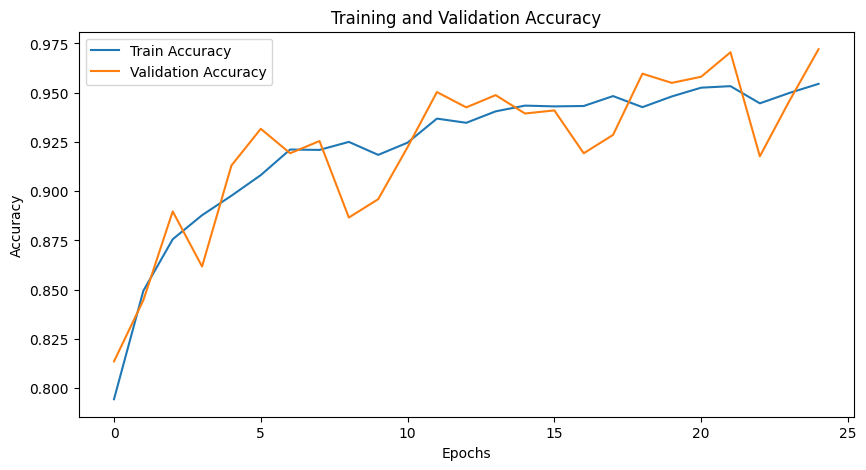

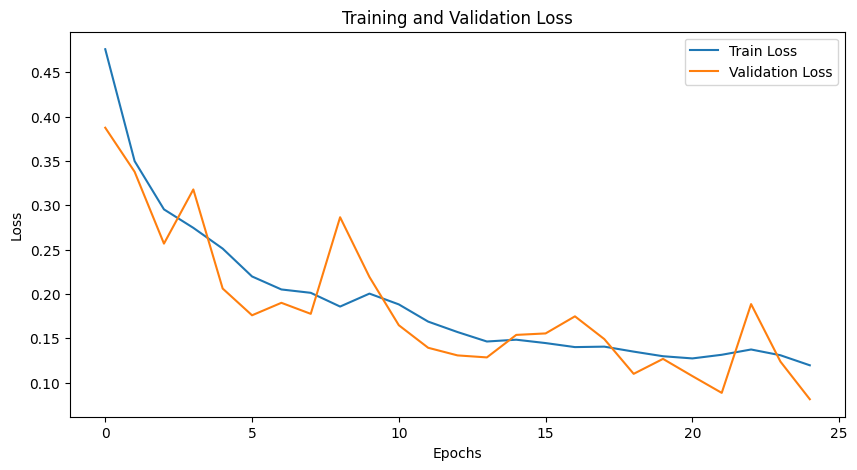

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Constants
IMG_SIZE = 224  # VGG16 standard input size
BATCH_SIZE = 32
NUM_CLASSES = 2  # Binary classification: kidney stone or no kidney stone
EPOCHS = 25  # Increased epochs for better convergence

# Step 1: Load the VGG16 Model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Step 2: Freeze the Base Model
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Add Custom Layers on Top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Prepare Data Generators
# Replace with your dataset paths
train_dir = '/kaggle/input/kidney/Kindey_Stone_Dataset/train'       # Update this path
val_dir = '/kaggle/input/kidney/Kindey_Stone_Dataset/val'   # Update this path
test_dir = '/kaggle/input/kidney/Kindey_Stone_Dataset/test'        # Update this path (optional, for test dataset)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important: Test data shouldn't be shuffled
)

# Step 6: Train the Model
# Save in `.keras` format (recommended) or `.h5` format (legacy)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('kidney_stone_vgg16.keras', save_best_only=True)
]

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)

# Step 7: Evaluate the Model on Validation and Test Datasets
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate on test set (optional)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 8: Plot Training and Validation Curves
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the final model
model.save('final_kidney_stone_model.keras')  # Final model saved in `.keras` format


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


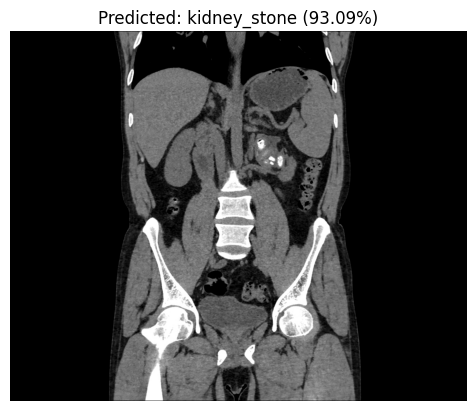

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('final_kidney_stone_model.keras')  # Update with the correct model file path

# Classes (match these with your dataset's folder names)
classes = ['normal', 'kidney_stone']  # Update based on your dataset structure

# Function to preprocess and predict
def predict_image(image_path):
    """
    Predict whether an image contains a kidney stone or not.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Predicted class label.
        float: Confidence score of the prediction.
    """
    IMG_SIZE = 224  # Image size should match the model's input size

    # Load and preprocess the image
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize the image
    image_array = img_to_array(image)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize the image (same as during training)

    # Predict using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)  # Get index of the highest probability
    predicted_class_label = classes[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]

    return predicted_class_label, confidence_score

# Test the function
image_path = '/kaggle/input/kidney/Kindey_Stone_Dataset/test/Stone/Stone- (1106).jpg'  # Update with the path to your image
predicted_label, confidence = predict_image(image_path)

# Display the image and prediction
image = load_img(image_path)  # Load the original image for display
plt.imshow(image)
plt.axis('off')  # Remove axis for better visualization
plt.title(f"Predicted: {predicted_label} ({confidence * 100:.2f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


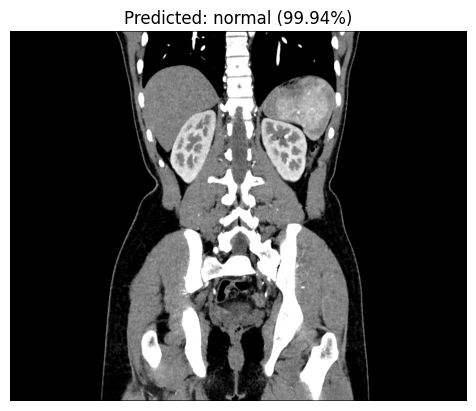

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('final_kidney_stone_model.keras')  # Update with the correct model file path

# Classes (match these with your dataset's folder names)
classes = ['normal', 'kidney_stone']  # Update based on your dataset structure

# Function to preprocess and predict
def predict_image(image_path):
    """
    Predict whether an image contains a kidney stone or not.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Predicted class label.
        float: Confidence score of the prediction.
    """
    IMG_SIZE = 224  # Image size should match the model's input size

    # Load and preprocess the image
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize the image
    image_array = img_to_array(image)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize the image (same as during training)

    # Predict using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)  # Get index of the highest probability
    predicted_class_label = classes[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]

    return predicted_class_label, confidence_score

# Test the function
image_path = '/kaggle/input/kidney/Kindey_Stone_Dataset/test/Normal/Normal- (1252).jpg'  # Update with the path to your image
predicted_label, confidence = predict_image(image_path)

# Display the image and prediction
image = load_img(image_path)  # Load the original image for display
plt.imshow(image)
plt.axis('off')  # Remove axis for better visualization
plt.title(f"Predicted: {predicted_label} ({confidence * 100:.2f}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


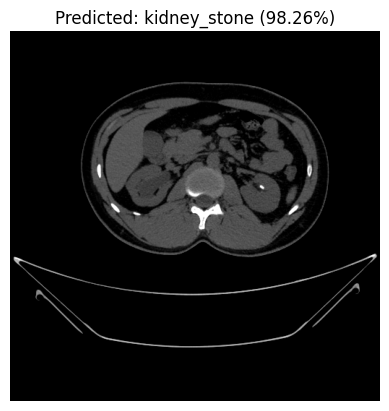

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('final_kidney_stone_model.keras')  # Update with the correct model file path

# Classes (match these with your dataset's folder names)
classes = ['normal', 'kidney_stone']  # Update based on your dataset structure

# Function to preprocess and predict
def predict_image(image_path):
    """
    Predict whether an image contains a kidney stone or not.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Predicted class label.
        float: Confidence score of the prediction.
    """
    IMG_SIZE = 224  # Image size should match the model's input size

    # Load and preprocess the image
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize the image
    image_array = img_to_array(image)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize the image (same as during training)

    # Predict using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)  # Get index of the highest probability
    predicted_class_label = classes[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]

    return predicted_class_label, confidence_score

# Test the function
image_path = '/kaggle/input/kidney/Kindey_Stone_Dataset/test/Stone/Stone- (212).jpg'  # Update with the path to your image
predicted_label, confidence = predict_image(image_path)

# Display the image and prediction
image = load_img(image_path)  # Load the original image for display
plt.imshow(image)
plt.axis('off')  # Remove axis for better visualization
plt.title(f"Predicted: {predicted_label} ({confidence * 100:.2f}%)")
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step
Confusion Matrix:
[[509   0]
 [ 16 123]]
Accuracy: 97.53%
Precision: 0.98
Recall (Sensitivity): 0.98
F1-Score: 0.97
Specificity: 1.00

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98       509
       Stone       1.00      0.88      0.94       139

    accuracy                           0.98       648
   macro avg       0.98      0.94      0.96       648
weighted avg       0.98      0.98      0.97       648



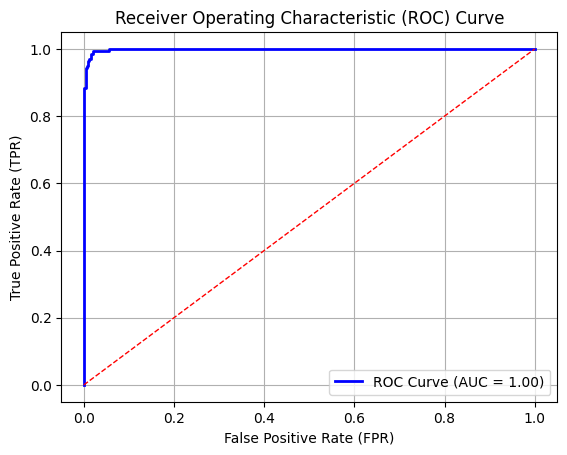

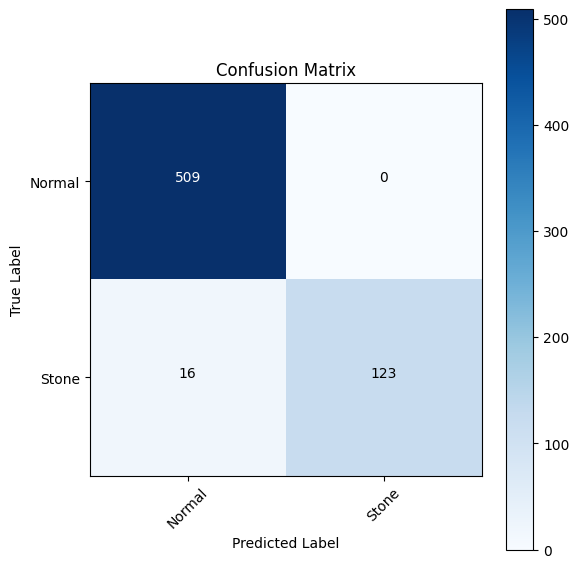

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
)

# Assuming test_generator and trained model are already defined
# test_generator: Generator for the test dataset
# model: Trained model

# Step 1: Get true labels and predictions
# Use the test generator to get all test data
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Weighted for multi-class
recall = recall_score(y_true, y_pred, average='weighted')  # Weighted for multi-class
f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted for multi-class

# Calculate Specificity (TN / (TN + FP)) for each class
tn, fp, fn, tp = conf_matrix.ravel()  # Confusion matrix flattened
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Step 5: ROC and AUC
# For binary classification, calculate ROC and AUC
if len(test_generator.class_indices) == 2:  # Ensure binary classification
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])  # For the positive class
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Random guess line
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC-AUC calculation is only applicable for binary classification.")

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations to confusion matrix
thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
